In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from data_preprocessing import IsriDataset
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score

GA_SOLUTIONS_PATH = "IsriDataset.pkl"

isri_dataset = pickle.load(open(GA_SOLUTIONS_PATH, 'rb'))

df = pd.DataFrame()
for i in range(len(isri_dataset.data['Jobdata'])):
    df_temp = pd.DataFrame.from_dict(isri_dataset.data['Jobdata'][i], orient='index')
    df = pd.concat([df, df_temp])

df[['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10','time11','time12']] = pd.DataFrame(df.times.tolist(), index= df.index)
#print(df)
# 'time11',

df_cluster = df[['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10','time12']] #due_date
#df_cluster.to_excel('output.xlsx', index=False)
#pd.plotting.scatter_matrix(df_cluster, alpha=0.2, figsize=(15,15))
#plt.show()




[[ 2.38529372e+02  2.06599732e+02  1.64793540e+02  1.08036151e+01
   1.06971464e+02  2.77478812e+02  2.19418695e+02  3.16488050e+02
   1.56567364e+02  2.17841222e+02  5.12627448e+02]
 [ 2.19089943e+02  2.06333124e+02  1.57300406e+02  7.72351092e+00
   1.02405075e+02  1.98232871e+02  1.50371476e+02  1.14968578e+02
   1.58012909e+02  2.15675347e+02  4.33537486e+02]
 [ 2.39729219e+02  2.14200000e+02  1.54434858e+02  1.00080000e+02
   1.42145914e+02  2.63216125e+02  2.15297686e+02  2.20870009e+02
   1.38090046e+02  2.23131515e+02  5.20147181e+02]
 [ 2.48100000e+02  4.51080000e+02  1.65480000e+02 -3.55271368e-15
   4.58400000e+01  2.64296571e+02  2.19600000e+02  3.16052816e+02
   1.61686041e+02  2.17200000e+02  5.23500000e+02]
 [ 2.19049409e+02  2.05680000e+02  1.57756778e+02 -1.06581410e-14
   9.44849831e+01  2.66033993e+02  2.15738389e+02  1.47012759e+02
   1.56298713e+02  2.17200000e+02  4.59165141e+02]
 [ 2.27640000e+02  4.51080000e+02  1.57200000e+02  5.68434189e-14
   3.75600000e+01  

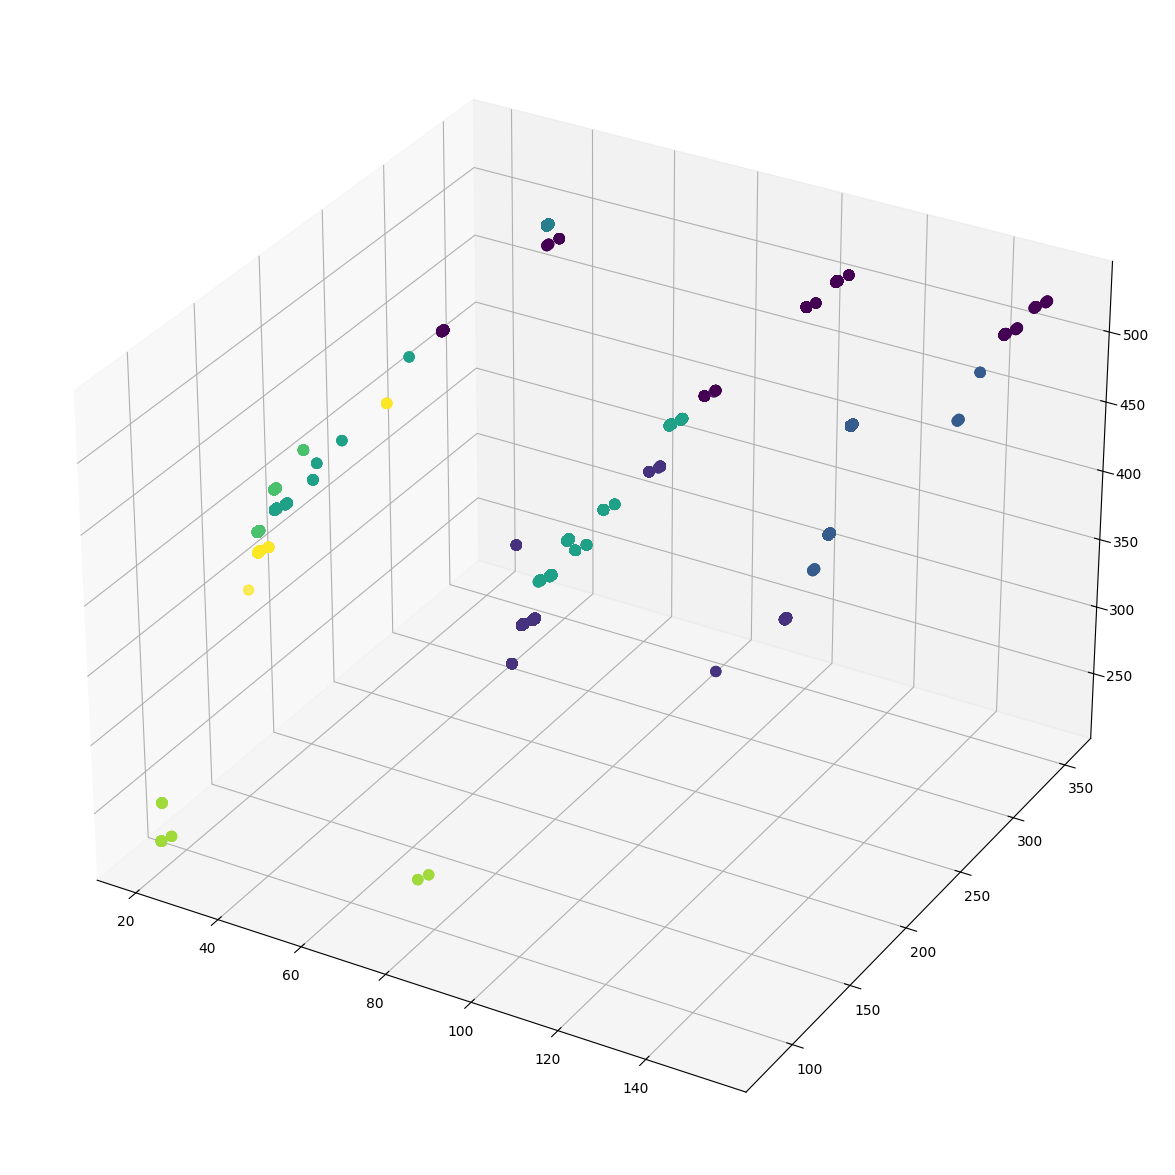

In [2]:
kmeans = KMeans(n_clusters=8).fit(df_cluster)
centroids = kmeans.cluster_centers_
print(centroids)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster['time5'], df_cluster['time8'], df_cluster['time12'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#pd.plotting.scatter_matrix(df_cluster, alpha=0.2, c=kmeans.labels_.astype(float), figsize=(15,15))
#plt.show()
# Matplotlib toolkits
# PCA
# Agglomeratives Clustern

In [3]:


pca = PCA(n_components = 2 )
pca.fit(df_cluster)
df_pca = pca.transform(df_cluster)
df_pca = pd.DataFrame(df_pca, columns = ['P1', 'P2']) 



Text(0, 0.5, 'PCA 2')

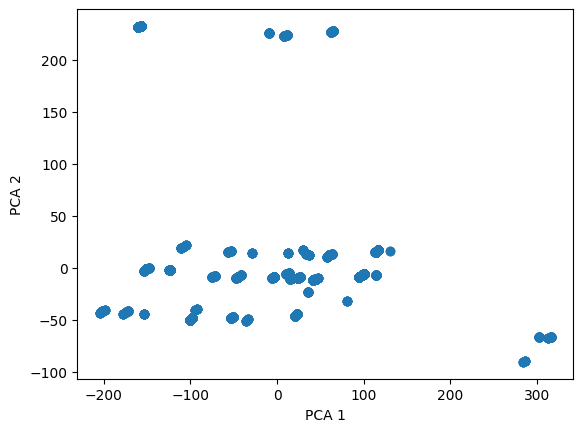

In [4]:
# Visualization before clustering

plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

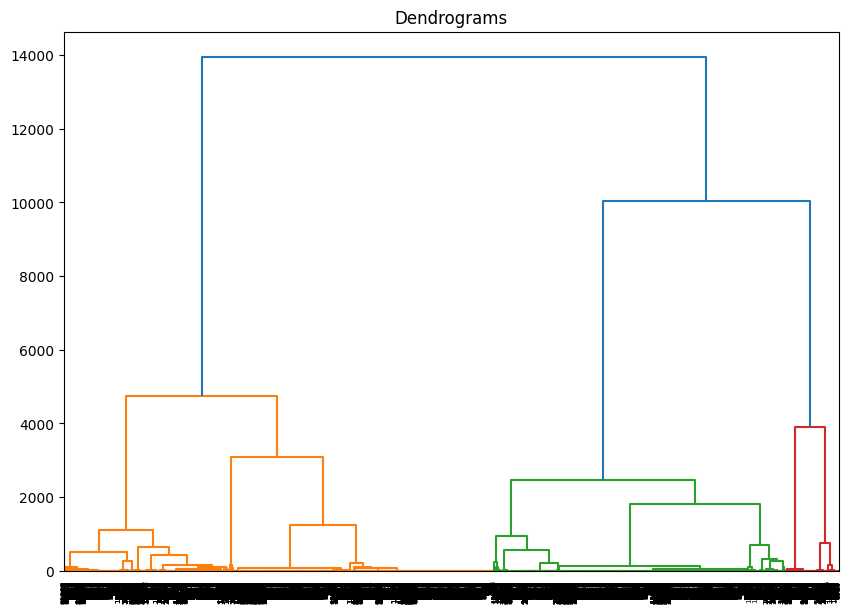

In [5]:

plt.figure(figsize = (10,7))
plt.title('Dendrograms')
plt.axhline(y=3, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [6]:
model = AgglomerativeClustering(n_clusters = 6)

y_means = model.fit_predict(df_pca)

In [9]:


silhouette = silhouette_score(df_pca, y_means)
print('Silhouette Score: ', silhouette )

davies_bouldin = davies_bouldin_score(df_pca, y_means)
print('Davies Bouldin Score: ', davies_bouldin )



Silhouette Score:  0.7562513332216588
Davies Bouldin Score:  0.26938972904611885


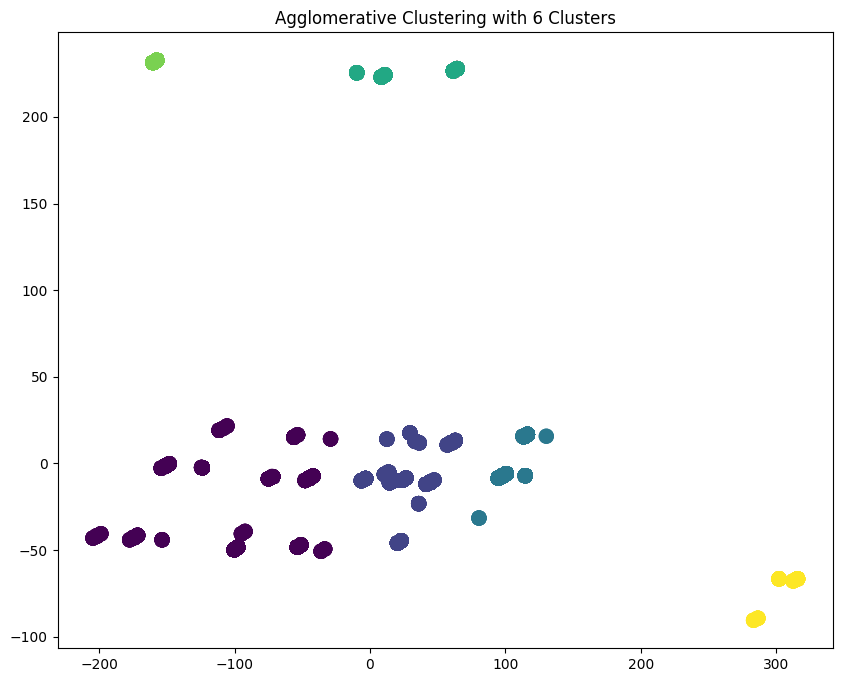

In [10]:
# Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('Agglomerative Clustering with 6 Clusters')

plt.scatter(df_pca.P1, df_pca.P2, c=y_means, s=100)